In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform
import platform
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
##그래프의 결과를 출력 세션에 나타나게 하자
%matplotlib inline 
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path ='C:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Can't find your system.")

In [28]:
#읍면동 구분하는 함수
def sort_dong(df):
    a=df.split(" ")
    if a[1][-1]=='동':
        return '동'
    elif a[1][-1]=='면':
        return '면'
    else :
        return '읍'
#동 구분하는 함수
def sort_dong2(df):
    a=df.split(" ")
    return a[1]
#년도 추출
def year(df):
    return df[:-2]
def sting(df):
    return str(df)
#평수 분해
def pyeong(df):
    if df< 33:
        return '10평 미만'
    elif df>= 33 and df < 66:
        return '10~20평'
    elif df>= 66 and df < 99:
        return '20~30평'
    elif df>= 99 and df < 132:
        return '30~40평'
    elif df>= 132 and df < 165:
        return '40~50평'
    elif df>= 165 and df < 198:
        return '50~60평'
    else:
        return '60평 이상'
def mon(df):
    return df[-2:]
def pyeong2(df):
    return int(df/3.3)
def riri(df):
    return int(float(df.replace(',','')))
def rep(df):
    if df == '-':
        return 0
    elif df.find('m이상') != -1:
        return df.replace('m이상','')
    else:
        return df.replace('m미만','')

In [29]:
data = pd.read_csv('3.세종시_아파트(매매)_실거래가.csv')

In [30]:
data_jeon = pd.read_csv('7.세종시_아파트(전월세)_실거래가.csv')
data_jeon["평"]=data_jeon["전용면적(㎡)"].apply(pyeong)

In [6]:
#data['거래금액(만원)'] =data['거래금액(만원)'].apply(riri)
#data_jeon['보증금(만원)'] =data_jeon['보증금(만원)'].apply(riri)

In [7]:
#### 이거 전세가액 구하는 공식
data_jeon2=data_jeon[data_jeon['전월세구분']=='전세']
#data_jeon2['보증금(만원)'] =data_jeon2['보증금(만원)'].apply(riri)
all_data2 = pd.merge(left=data,right=data_jeon2,how='left',on=["계약년월",'시군구','단지명','전용면적(㎡)'],sort=False)
idx_not=all_data2[all_data2['계약일_y'].isnull()].index
all_data2_notnull=all_data2.drop(idx_not)
all_data2_notnull['계약년월'] =all_data2_notnull['계약년월'].apply(sting)
all_data2_notnull['거래금액(만원)'] =all_data2_notnull['거래금액(만원)'].apply(riri)
all_data2_notnull['보증금(만원)']=all_data2_notnull['보증금(만원)'].apply(riri)
all_data2_notnull['전세가율']=(all_data2_notnull['보증금(만원)']/all_data2_notnull['거래금액(만원)'])*100
#all_data2_notnull.groupby('계약년월').mean()

<ipython-input-42-fd911250ca8b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_jeon3['계약년월']=data_jeon3['계약년월'].astype(str)
<ipython-input-42-fd911250ca8b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_jeon3['평평']=data_jeon3["전용면적(㎡)"].apply(pyeong2)
<ipython-input-42-fd911250ca8b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

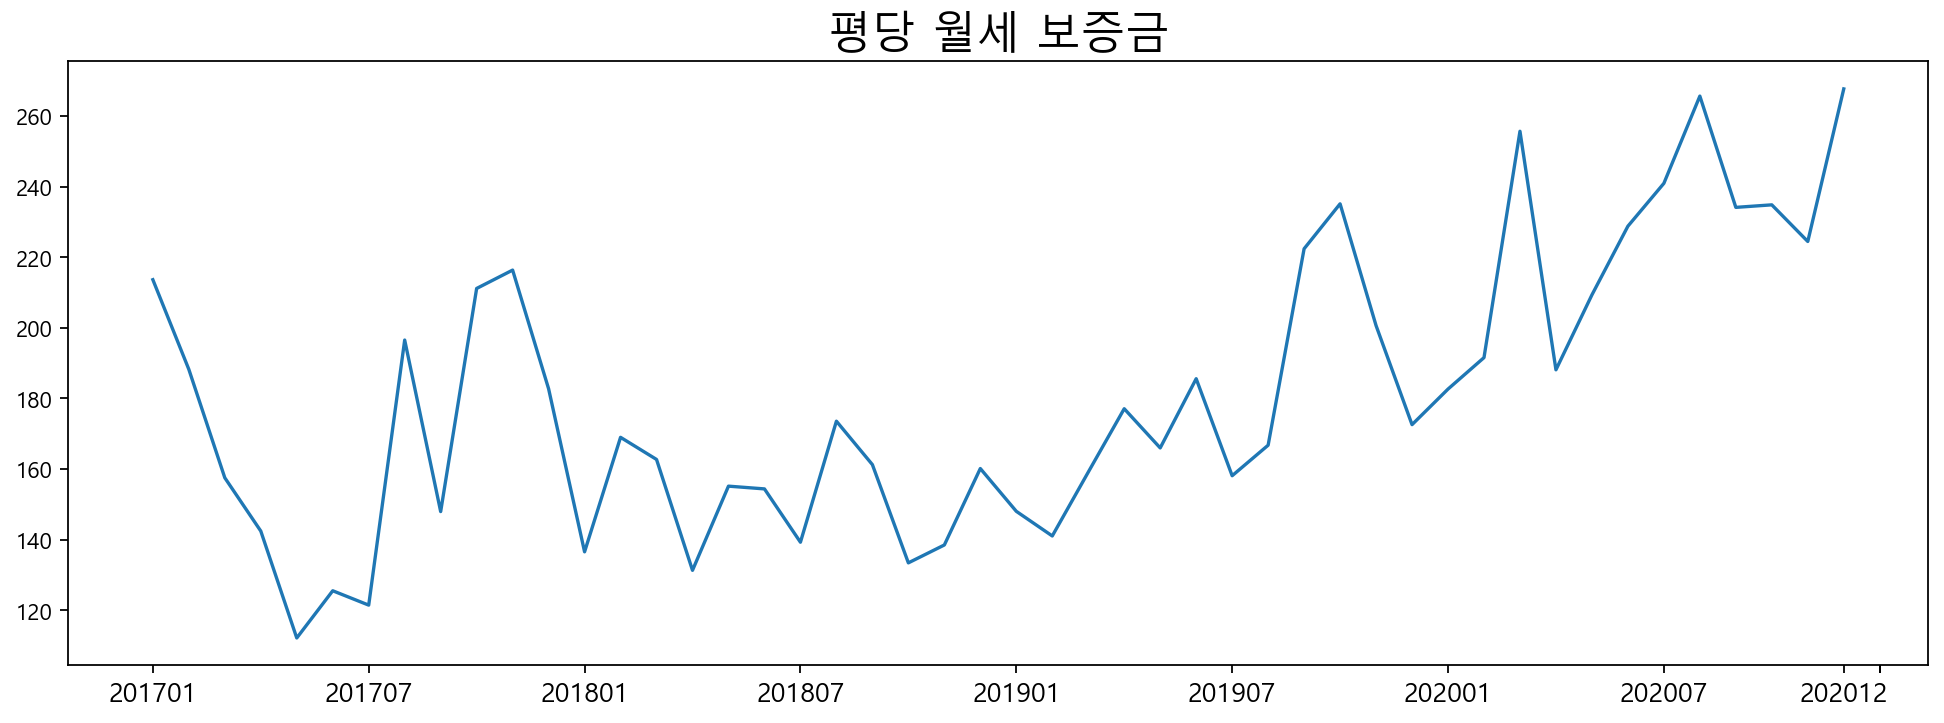

In [42]:
data_jeon3=data_jeon[data_jeon['전월세구분']=='월세']
data_jeon3['계약년월']=data_jeon3['계약년월'].astype(str)
data_jeon3['평평']=data_jeon3["전용면적(㎡)"].apply(pyeong2)
data_jeon3['보증금(만원)']=data_jeon3["보증금(만원)"].apply(riri)
data_jeon3['평당 보증금']=data_jeon3["보증금(만원)"]/data_jeon3['평평']
tt4=data_jeon3.groupby('계약년월').mean()
plt.figure(figsize=(15,5),dpi=160)
plt.plot(tt4.index,tt4['평당 보증금'])
a='평당 월세 보증금'
plt.title(a,fontsize=20)
plt.xticks(att,fontsize=12)
plt.savefig(a+'.png')

<ipython-input-41-a99520d1e9a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_jeon2['계약년월']=data_jeon2['계약년월'].astype(str)
<ipython-input-41-a99520d1e9a4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_jeon2['평평']=data_jeon2["전용면적(㎡)"].apply(pyeong2)
<ipython-input-41-a99520d1e9a4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

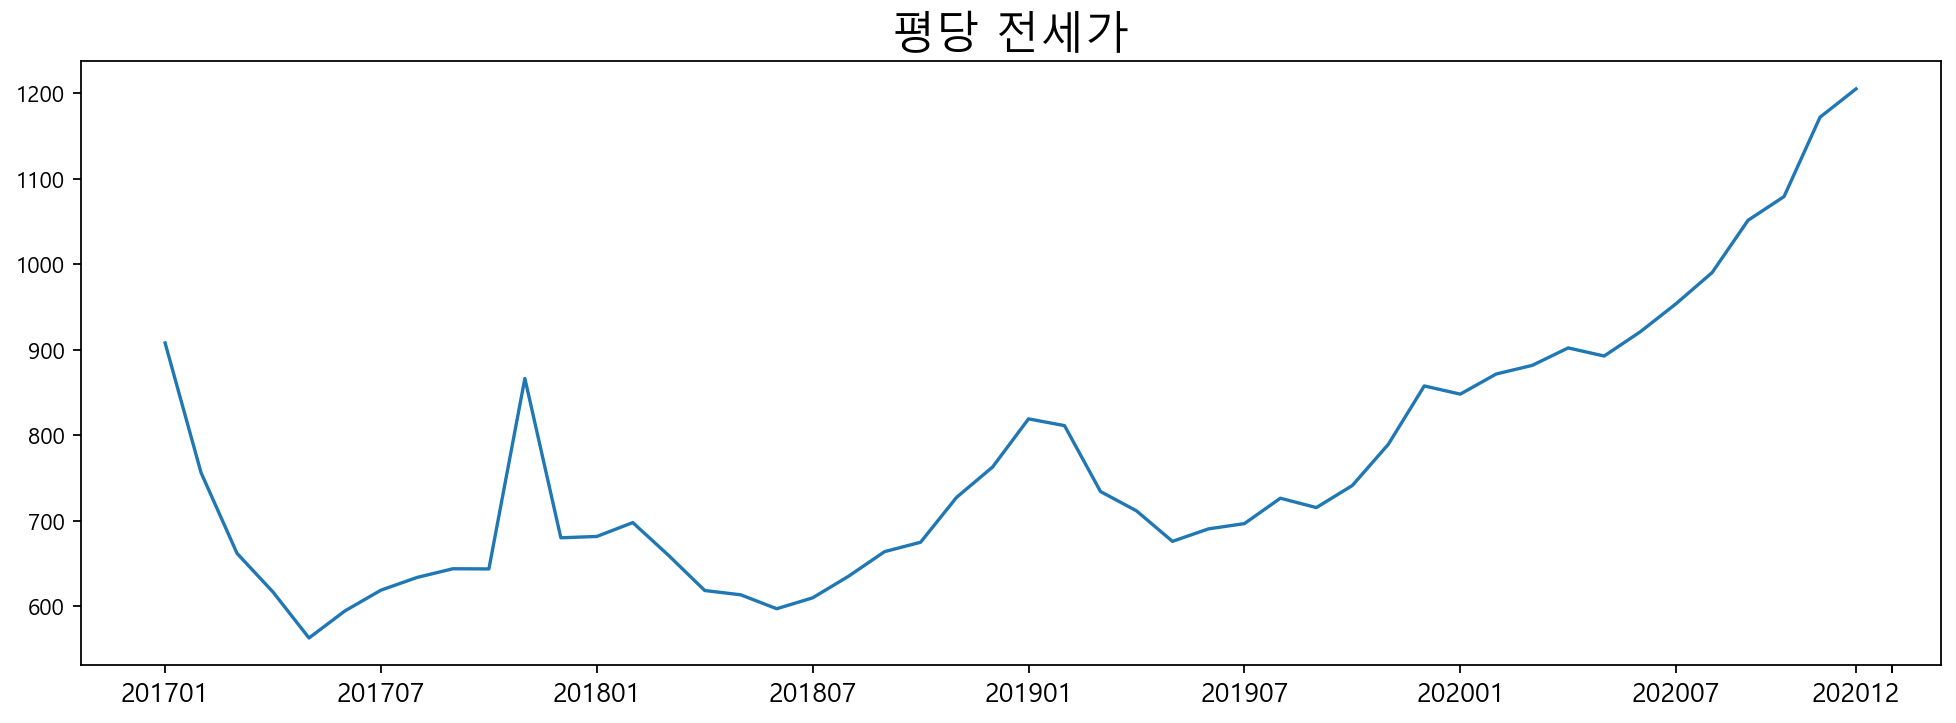

In [41]:
data_jeon2=data_jeon[data_jeon['전월세구분']=='전세']
data_jeon2['계약년월']=data_jeon2['계약년월'].astype(str)
data_jeon2['평평']=data_jeon2["전용면적(㎡)"].apply(pyeong2)
data_jeon2['보증금(만원)']=data_jeon2["보증금(만원)"].apply(riri)
data_jeon2['평당 보증금']=data_jeon2["보증금(만원)"]/data_jeon2['평평']
tt3=data_jeon2.groupby('계약년월').mean()
plt.figure(figsize=(15,5),dpi=160)
plt.plot(tt3.index,tt3['평당 보증금'])
a='평당 전세가'
plt.title(a,fontsize=20)
plt.xticks(att,fontsize=12)
plt.savefig(a+'.png')

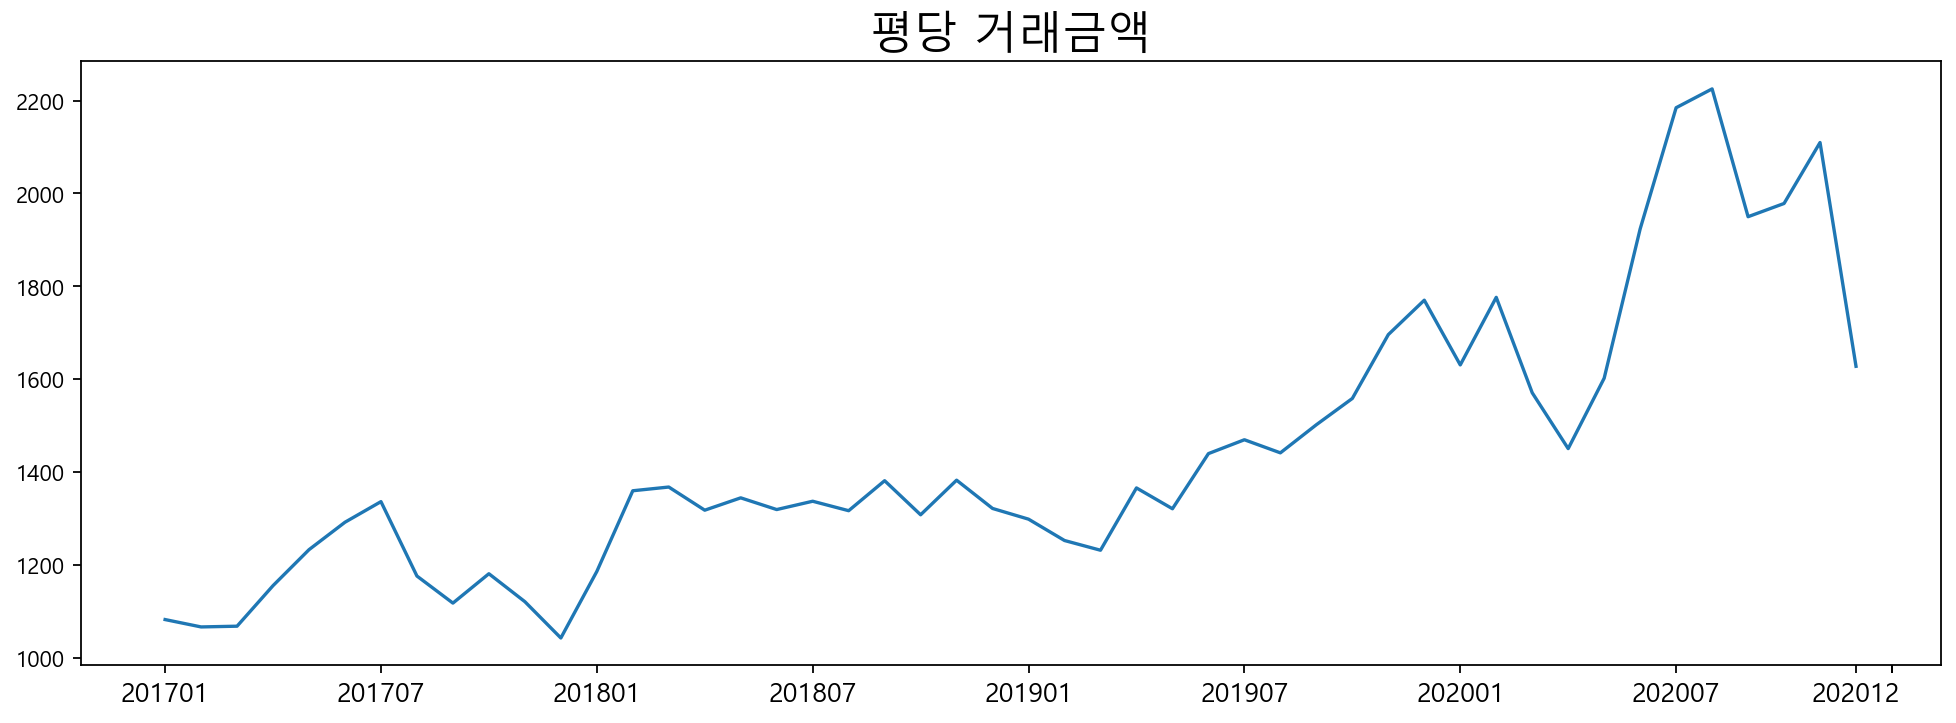

In [40]:
data['계약년월']=data['계약년월'].astype(str)
data['평평']=data["전용면적(㎡)"].apply(pyeong2)
#data['거래금액(만원)']=data['거래금액(만원)'].apply(riri)
data['평당 거래금액']=data['거래금액(만원)']/data['평평']
tt4=data.groupby('계약년월').mean()
plt.figure(figsize=(15,5),dpi=160)
plt.plot(tt4.index,tt4['평당 거래금액'])
a='평당 거래금액'
plt.title(a,fontsize=20)
plt.xticks(att,fontsize=12)
plt.savefig(a+'.png')

In [24]:
att=[]
for i in range(len(list(tt1.index))):
    if i%6 == 0:
        att.append(list(tt1.index)[i])
    elif i==len(list(tt1.index))-1:
        att.append(list(tt1.index)[i])
    else:
        att.append('')
print(att)

['201701', '', '', '', '', '', '201707', '', '', '', '', '', '201801', '', '', '', '', '', '201807', '', '', '', '', '', '201901', '', '', '', '', '', '201907', '', '', '', '', '', '202001', '', '', '', '', '', '202007', '', '', '', '', '202012']


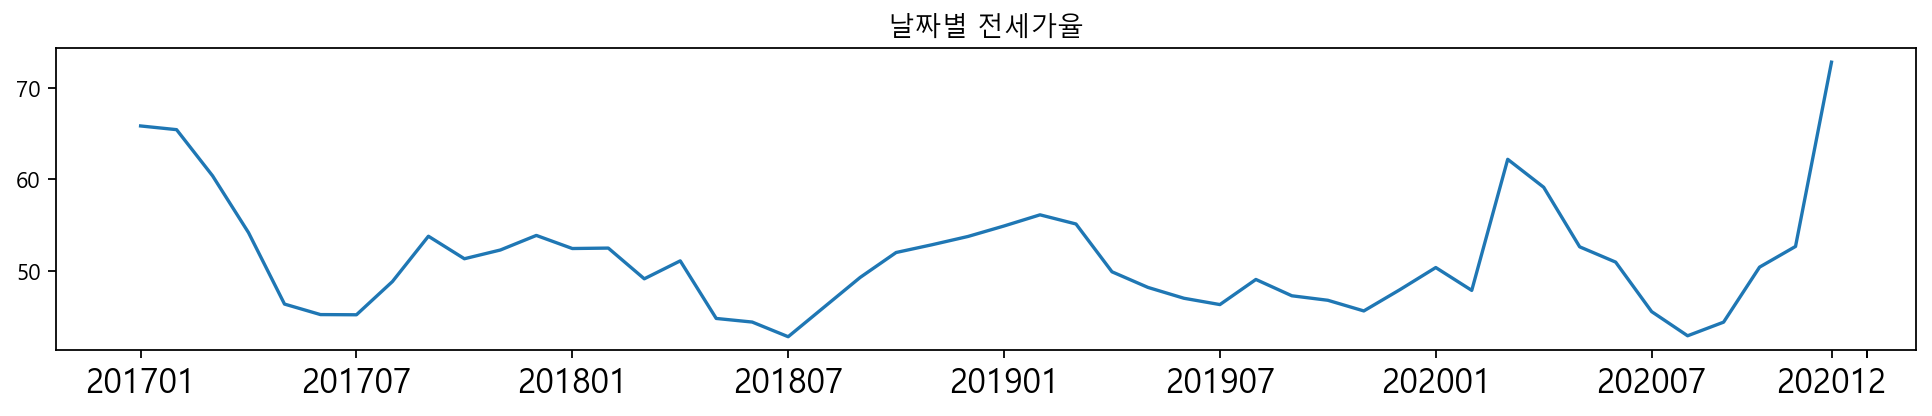

In [17]:
tt1=all_data2_notnull.groupby('계약년월').mean()
plt.figure(figsize=(15,2.5),dpi=160)
plt.plot(tt1.index,tt1['전세가율'])
a='날짜별 전세가율'
plt.title(a)
plt.xticks(att,fontsize=15)
plt.savefig(a+'.png')